In [ ]:
import pandas as pd
import json

file_path = '/content/reviews_5_balanced.json'
data = []

# Read the file line by line
with open(file_path, 'r') as file:
    for line in file:
        try:
            data.append(json.loads(line))
        except ValueError as e:
            print(f"Error parsing line: {e}")

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)


In [ ]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime
0,1,True,"03 12, 2018",A3QY3THQ42WSCQ,B000YFSR5G,Waaaay too BIG,One Star,1520812800
1,1,True,"03 12, 2018",A3QY3THQ42WSCQ,B000YFSR4W,Waaaay too BIG,One Star,1520812800
2,1,True,"02 8, 2017",A21HH0VIBKK80J,B000YFSR5G,"Was terribly disappointed, the pants were way ...","Was terribly disappointed, the pants were way ...",1486512000
3,1,True,"02 8, 2017",A21HH0VIBKK80J,B000YFSR4W,"Was terribly disappointed, the pants were way ...","Was terribly disappointed, the pants were way ...",1486512000
4,1,True,"02 19, 2018",A276HQXYS553QW,B0014F8TIU,Constantly rolls down,One Star,1518998400
...,...,...,...,...,...,...,...,...
294235,5,True,"02 22, 2018",ALOZCFDT43XJ7,B00TL4MTBO,"Great flavor, texture, and shelf life.",Five Stars,1519257600
294236,5,True,"12 22, 2015",A26HN06VW3PV73,B004CYJX2Q,very happy,Five Stars,1450742400
294237,5,True,"06 27, 2015",A188FY6OWG648C,B00DOI1WB6,works great cant complain,Five Stars,1435363200
294238,5,True,"04 22, 2018",A1SL08XD4D6STB,B00N6X9VY4,Very good quality runs like timex.,Love the kick stand.,1524355200


In [ ]:
df1=df

In [ ]:
from datetime import datetime
df['reviewTime'] = pd.to_datetime(df['reviewTime'], format='%m %d, %Y')

# Convert 'unixReviewTime' from Unix time to datetime format
# Assuming 'df' is your DataFrame and it has a column 'unixReviewTime' with Unix timestamps

# Convert 'unixReviewTime' from Unix timestamp to datetime format
df['unixReviewTime'] = pd.to_datetime(df['unixReviewTime'], unit='s')

# Format 'unixReviewTime' as a string in the specified format
df['formatted_unixReviewTime'] = df['unixReviewTime'].dt.strftime('%Y-%m-%d %H:%M:%S')

# Display the first few rows to verify the changes
print(df[['unixReviewTime', 'formatted_unixReviewTime']].head())


  unixReviewTime formatted_unixReviewTime
0     2018-03-12      2018-03-12 00:00:00
1     2018-03-12      2018-03-12 00:00:00
2     2017-02-08      2017-02-08 00:00:00
3     2017-02-08      2017-02-08 00:00:00
4     2018-02-19      2018-02-19 00:00:00


In [ ]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime,formatted_unixReviewTime
0,1,True,2018-03-12,A3QY3THQ42WSCQ,B000YFSR5G,Waaaay too BIG,One Star,2018-03-12,2018-03-12 00:00:00
1,1,True,2018-03-12,A3QY3THQ42WSCQ,B000YFSR4W,Waaaay too BIG,One Star,2018-03-12,2018-03-12 00:00:00
2,1,True,2017-02-08,A21HH0VIBKK80J,B000YFSR5G,"Was terribly disappointed, the pants were way ...","Was terribly disappointed, the pants were way ...",2017-02-08,2017-02-08 00:00:00
3,1,True,2017-02-08,A21HH0VIBKK80J,B000YFSR4W,"Was terribly disappointed, the pants were way ...","Was terribly disappointed, the pants were way ...",2017-02-08,2017-02-08 00:00:00
4,1,True,2018-02-19,A276HQXYS553QW,B0014F8TIU,Constantly rolls down,One Star,2018-02-19,2018-02-19 00:00:00


In [ ]:
df1.isnull().sum()

overall                       0
verified                      0
reviewTime                    0
reviewerID                    0
asin                          0
reviewText                    0
summary                     108
unixReviewTime                0
formatted_unixReviewTime      0
dtype: int64

In [ ]:
df1["summary"].fillna("No Summary", inplace = True)

In [ ]:
df1.isnull().sum()

overall                     0
verified                    0
reviewTime                  0
reviewerID                  0
asin                        0
reviewText                  0
summary                     0
unixReviewTime              0
formatted_unixReviewTime    0
dtype: int64

Get only relevant columns

In [ ]:
dfimp=df1[['overall', 'reviewText']]

In [ ]:
dfimp

,overall,reviewText
0,1,Waaaay too BIG
1,1,Waaaay too BIG
2,1,"Was terribly disappointed, the pants were way ..."
3,1,"Was terribly disappointed, the pants were way ..."
4,1,Constantly rolls down
...,...,...
294235,5,"Great flavor, texture, and shelf life."
294236,5,very happy
294237,5,works great cant complain
294238,5,Very good quality runs like timex.


In [ ]:
#Text preprocessing:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Function to preprocess text
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [token.lower() for token in tokens]

    # Stopwords removal
    tokens = [token for token in tokens if token not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

# Apply preprocessing to the reviewText column
dfimp['reviewText'] = dfimp['reviewText'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-11-bcff142c3fc3>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfimp['reviewText'] = dfimp['reviewText'].apply(preprocess_text)


In [ ]:
dfimp

,overall,reviewText
0,1,waaaay big
1,1,waaaay big
2,1,"terribly disappointed , pant way large leg , h..."
3,1,"terribly disappointed , pant way large leg , h..."
4,1,constantly roll
...,...,...
294235,5,"great flavor , texture , shelf life ."
294236,5,happy
294237,5,work great cant complain
294238,5,good quality run like timex .


Label encode

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'overall' column
dfimp['overall_encoded'] = label_encoder.fit_transform(dfimp['overall'])

# Print the mapping of original labels to encoded labels
print("Mapping of original labels to encoded labels:")
for label, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{label} -> {encoded_label}")


Mapping of original labels to encoded labels:
1 -> 0
2 -> 1
4 -> 2
5 -> 3


<ipython-input-13-dc68eba14796>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfimp['overall_encoded'] = label_encoder.fit_transform(dfimp['overall'])


In [ ]:
dfimp

,overall,reviewText,overall_encoded
0,1,waaaay big,0
1,1,waaaay big,0
2,1,"terribly disappointed , pant way large leg , h...",0
3,1,"terribly disappointed , pant way large leg , h...",0
4,1,constantly roll,0
...,...,...,...
294235,5,"great flavor , texture , shelf life .",3
294236,5,happy,3
294237,5,work great cant complain,3
294238,5,good quality run like timex .,3


In [ ]:
# Get the range of values in the 'overall' column
overall_min = df['overall'].min()
overall_max = df['overall'].max()

print("Range of values in the 'overall' column:")
print("Minimum value:", overall_min)
print("Maximum value:", overall_max)


Range of values in the 'overall' column:
Minimum value: 1
Maximum value: 5


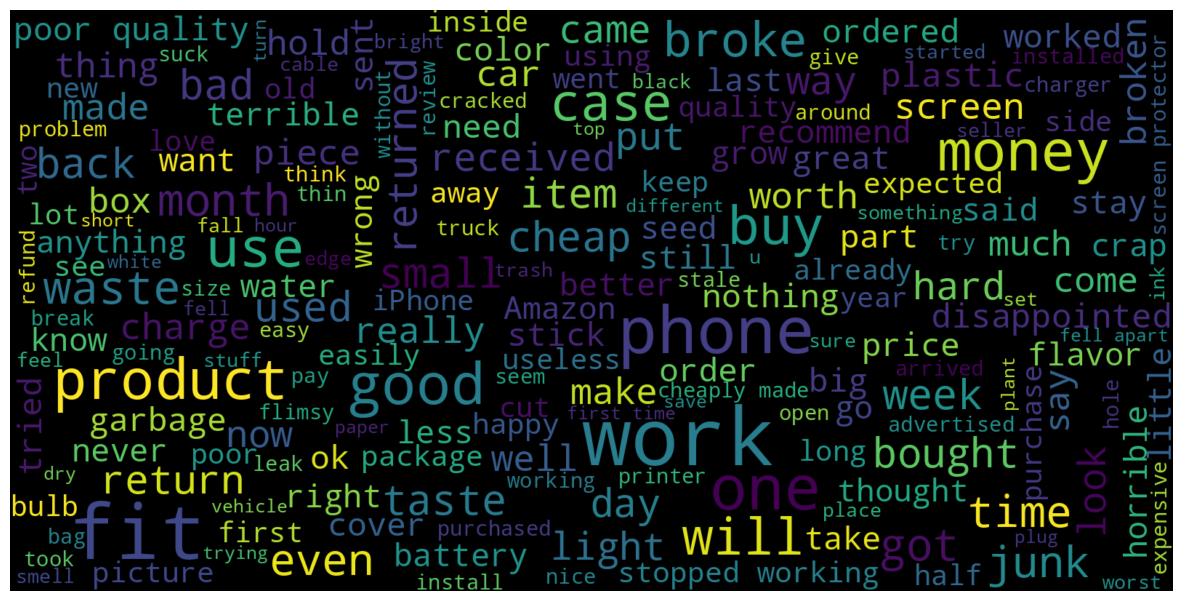

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the DataFrame to select rows with the lowest sentiment score (overall rating == 1)
negative_reviews = df[df['overall'] == 1]

# Concatenate the text of negative reviews into a single string
consolidated = ' '.join(review for review in negative_reviews['reviewText'])

# Generate the word cloud if there are negative reviews available
if consolidated:
    wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No negative reviews found. Unable to generate word cloud.")


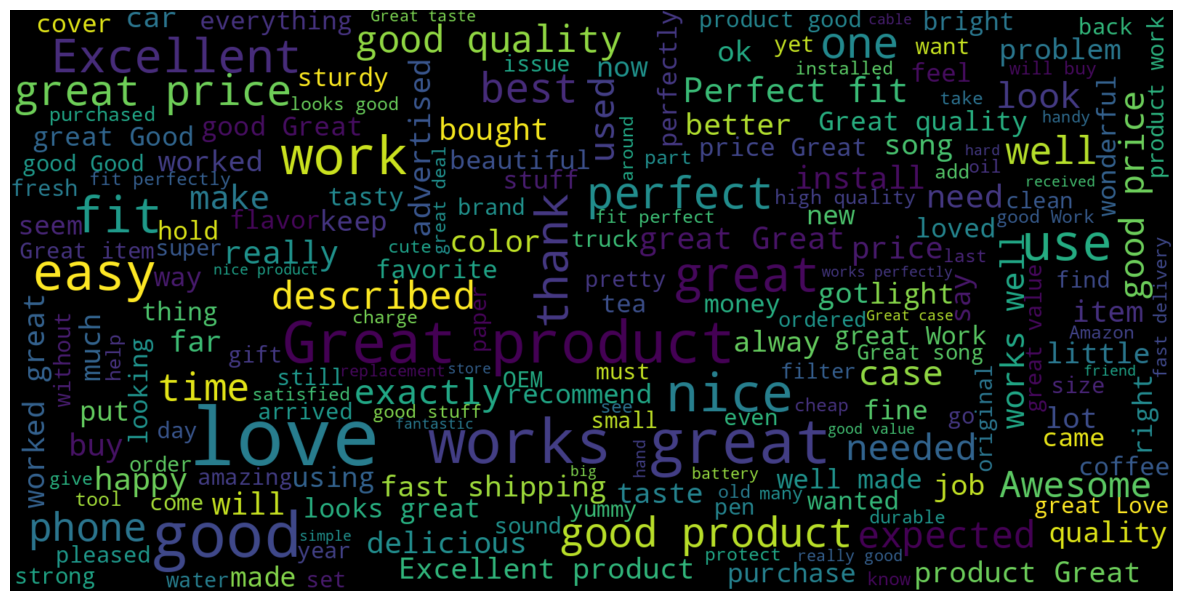

In [ ]:
# Filter the DataFrame to select rows with the highest sentiment score (overall rating == 5)
positive_reviews = df[df['overall'] == 5]

# Concatenate the text of positive reviews into a single string
consolidated = ' '.join(review for review in positive_reviews['reviewText'])

# Generate the word cloud if there are positive reviews available
if consolidated:
    wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)
    plt.figure(figsize=(15, 10))
    plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("No positive reviews found. Unable to generate word cloud.")


Vectorization techniques

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import NMF
from sklearn.metrics import classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dfimp['reviewText'], dfimp['overall_encoded'], test_size=0.5, random_state=42)


In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#CountVectorizer LR
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform CountVectorizer on the training data
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Initialize Logistic Regression model
lr_model_count = LogisticRegression()

# Train the model
lr_model_count.fit(X_train_count, y_train)

# Predict on the test data
y_pred_count = lr_model_count.predict(X_test_count)

# Evaluation Metrics
# Classification Report
print("Classification Report for Logistic Regression with with Count Vectorizer:")
print(classification_report(y_test, y_pred_count))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression with with Count Vectorizer:
              precision    recall  f1-score   support

           0       0.63      0.71      0.67     42400
           1       0.48      0.35      0.40     29593
           2       0.32      0.06      0.10     11616
           3       0.75      0.90      0.82     63511

    accuracy                           0.67    147120
   macro avg       0.55      0.50      0.50    147120
weighted avg       0.63      0.67      0.64    147120



In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#TFIDF LR
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform TF-IDF Vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Logistic Regression model
lr_model_tfidf = LogisticRegression()

# Train the model
lr_model_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_tfidf = lr_model_tfidf.predict(X_test_tfidf)

# Evaluation Metrics
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, average='weighted')
recall_tfidf = recall_score(y_test, y_pred_tfidf, average='weighted')
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted')
#oc_auc_tfidf = roc_auc_score(y_test, y_pred_tfidf)

# Print evaluation metrics
print("Evaluation Metrics with TF-IDF:")
print(f"Accuracy: {accuracy_tfidf}")
print(f"Precision: {precision_tfidf}")
print(f"Recall: {recall_tfidf}")
print(f"F1 Score: {f1_tfidf}")
# Classification Report
print("Classification Report for Logistics Regression with TF-IDF:")
print(classification_report(y_test, y_pred_tfidf))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluation Metrics with TF-IDF:
Accuracy: 0.6700584556824362
Precision: 0.6413669807526481
Recall: 0.6700584556824362
F1 Score: 0.634960788649798
Classification Report for Logistics Regression with TF-IDF:
              precision    recall  f1-score   support

           0       0.63      0.72      0.67     42400
           1       0.48      0.36      0.41     29593
           2       0.47      0.03      0.06     11616
           3       0.76      0.89      0.82     63511

    accuracy                           0.67    147120
   macro avg       0.58      0.50      0.49    147120
weighted avg       0.64      0.67      0.63    147120



In [ ]:
# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform CountVectorizer on the training data
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Initialize Random Forest Classifier
rf_model_count = RandomForestClassifier()

# Train the model
rf_model_count.fit(X_train_count, y_train)

# Predict on the test data
y_pred_count = rf_model_count.predict(X_test_count)

# Evaluation Metrics
accuracy_count = accuracy_score(y_test, y_pred_count)
precision_count = precision_score(y_test, y_pred_count, average='weighted')
recall_count = recall_score(y_test, y_pred_count, average='weighted')
f1_count = f1_score(y_test, y_pred_count, average='weighted')

# Print evaluation metrics
print("Evaluation Metrics with CountVectorizer and Random Forest:")
print(f"Accuracy: {accuracy_count}")
print(f"Precision: {precision_count}")
print(f"Recall: {recall_count}")
print(f"F1 Score: {f1_count}")
# Classification Report
print("Classification Report for Count Vectorizer with Random Forest:")
print(classification_report(y_test, y_pred_count))


KeyboardInterrupt: 

In [ ]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform TF-IDF vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Random Forest Classifier
rf_model_tfidf = RandomForestClassifier()

# Train the model
rf_model_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_tfidf = rf_model_tfidf.predict(X_test_tfidf)

# Classification Report
print("Classification Report for Random Forest with TF-IDF:")
print(classification_report(y_test, y_pred_tfidf))

KeyboardInterrupt: 

In [ ]:
#Gradient boost classifier

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform CountVectorizer on the training data
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

# Initialize Gradient Boosting Classifier
gb_model_count = GradientBoostingClassifier()

# Train the model
gb_model_count.fit(X_train_count, y_train)

# Predict on the test data
y_pred_count = gb_model_count.predict(X_test_count)


# Classification Report
print("Classification Report for Gradient Boosting with Count Vectorizer:")
print(classification_report(y_test, y_pred_count))

Classification Report for Gradient Boosting with Count Vectorizer:
              precision    recall  f1-score   support

           0       0.50      0.81      0.61     42400
           1       0.49      0.20      0.29     29593
           2       0.41      0.01      0.03     11616
           3       0.74      0.76      0.75     63511

    accuracy                           0.60    147120
   macro avg       0.53      0.45      0.42    147120
weighted avg       0.59      0.60      0.56    147120



In [ ]:
#TFIDF with gradient boost
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform TF-IDF Vectorizer on the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Gradient Boosting Classifier
gb_model_tfidf = GradientBoostingClassifier()

# Train the model
gb_model_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred_tfidf = gb_model_tfidf.predict(X_test_tfidf)

# Classification Report
print("Classification Report for Gradient Boosting with TF_IDF:")
print(classification_report(y_test, y_pred_tfidf))

#Feature importance check
importances= gb_model_tfidf.feature_importances_
feature_names= tfidf_vectorizer.get_feature_names_out()
df_importance=pd.DataFrame(importances, index=feature_names, columns=['importance']).sort_values(by='importance')

df_norm=df_importance.tail(20)/df_importance.max()*100
print(df_norm)

Classification Report for Gradient Boosting with TF_IDF:
              precision    recall  f1-score   support

           0       0.50      0.82      0.62     42400
           1       0.49      0.21      0.29     29593
           2       0.45      0.02      0.04     11616
           3       0.76      0.76      0.76     63511

    accuracy                           0.61    147120
   macro avg       0.55      0.45      0.43    147120
weighted avg       0.60      0.61      0.57    147120

           importance
easy         3.595132
cheap        3.667579
delicious    3.905725
money        3.928318
described    4.103883
month        4.675075
well         4.897721
ok           5.030986
waste        5.576166
perfectly    6.815462
awesome      6.863254
best         7.228491
broke        7.445681
junk         8.417881
nice        15.329162
excellent   19.367242
perfect     27.872545
love        37.893870
good        38.702147
great      100.000000


NameError: name 'plot' is not defined

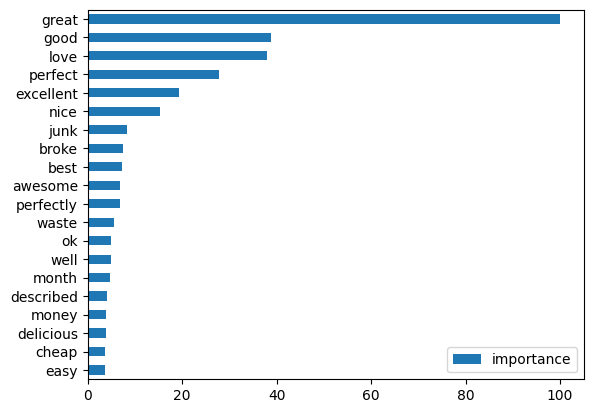

In [ ]:
import seaborn as sns
ax=df_norm.plot.barh()
plot.show()

In [ ]:
# NMF With Random Forest

# NMF
nmf = NMF(n_components=50, random_state=42)
X_train_nmf = nmf.fit_transform(X_train_tfidf)
X_test_nmf = nmf.transform(X_test_tfidf)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train_nmf, y_train)
y_pred = rf_model.predict(X_test_nmf)

# Classification Report
print("Classification Report for Random Forest with NMF:")
print(classification_report(y_test, y_pred))


Classification Report for Random Forest with NMF:
              precision    recall  f1-score   support

           0       0.60      0.71      0.65     42400
           1       0.46      0.31      0.37     29593
           2       0.27      0.03      0.05     11616
           3       0.73      0.87      0.79     63511

    accuracy                           0.65    147120
   macro avg       0.52      0.48      0.47    147120
weighted avg       0.60      0.65      0.61    147120



In [ ]:
# NMF with Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_nmf, y_train)
y_pred_lr = lr_model.predict(X_test_nmf)

# Classification Report
print("Classification Report for Logistic Regression with NMF:")
print(classification_report(y_test, y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report for Logistic Regression with NMF:
              precision    recall  f1-score   support

           0       0.48      0.83      0.61     42400
           1       0.41      0.07      0.12     29593
           2       0.00      0.00      0.00     11616
           3       0.70      0.76      0.73     63511

    accuracy                           0.58    147120
   macro avg       0.40      0.41      0.36    147120
weighted avg       0.52      0.58      0.51    147120



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# NMF with Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_nmf, y_train)
y_pred_gb = gb_model.predict(X_test_nmf)

# Classification Report
print("Classification Report for Gradient Boosting with NMF:")
print(classification_report(y_test, y_pred_gb))


KeyboardInterrupt: 

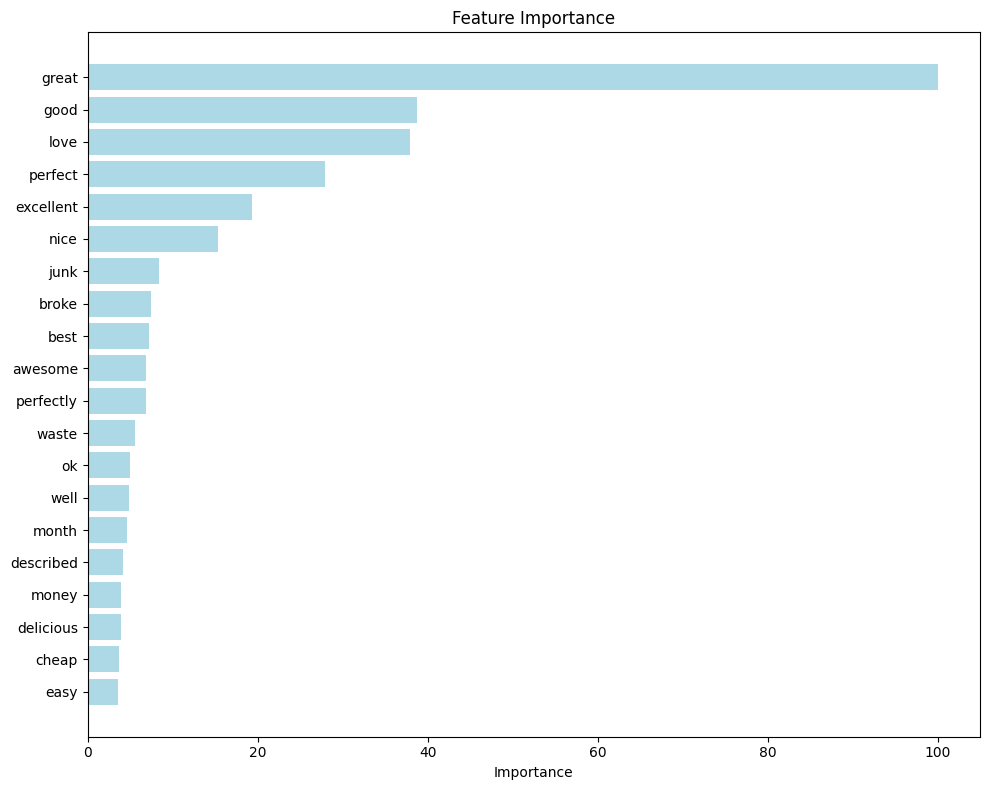

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the features and their importances
features = [
    'easy', 'cheap', 'delicious', 'money', 'described',
    'month', 'well', 'ok', 'waste', 'perfectly', 'awesome',
    'best', 'broke', 'junk', 'nice', 'excellent', 'perfect',
    'love', 'good', 'great'
]
importances = [
    3.595132, 3.667579, 3.905725, 3.928318, 4.103883,
    4.675075, 4.897721, 5.030986, 5.576166, 6.815462, 6.863254,
    7.228491, 7.445681, 8.417881, 15.329162, 19.367242, 27.872545,
    37.893870, 38.702147, 100.000000
]

# Create a pandas DataFrame
df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance for better visualization
df = df.sort_values(by='Importance', ascending=True)

# Plot the DataFrame
plt.figure(figsize=(10, 8))
plt.barh(df['Feature'], df['Importance'], color='lightblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()


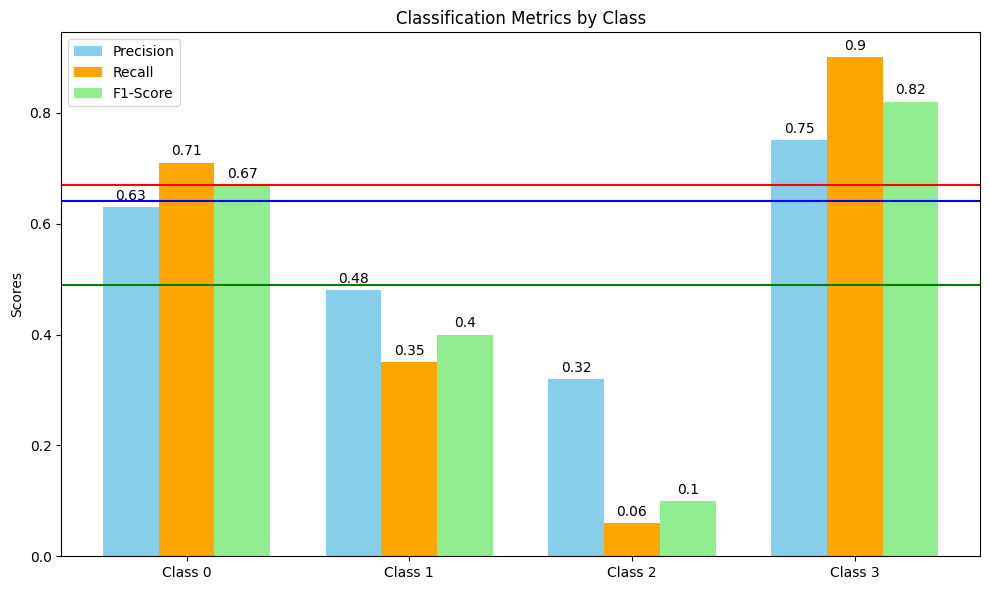

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the classes and their scores
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3']
precision = [0.63, 0.48, 0.32, 0.75]
recall = [0.71, 0.35, 0.06, 0.90]
f1_score = [0.67, 0.40, 0.10, 0.82]
accuracy = 0.67
macro_avg = 0.49
weighted_avg = 0.64

x = np.arange(len(classes))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision', color='skyblue')
rects2 = ax.bar(x, recall, width, label='Recall', color='orange')
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics by Class')
ax.set_xticks(x)
ax.set_xticklabels(classes)
ax.legend()

# Annotate the scores for each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

# Adding lines for average scores
ax.axhline(y=accuracy, color='r', linestyle='-', label='Accuracy')
ax.axhline(y=macro_avg, color='g', linestyle='-', label='Macro Avg')
ax.axhline(y=weighted_avg, color='b', linestyle='-', label='Weighted Avg')

fig.tight_layout()

plt.show()
